In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.integrate import odeint

In [52]:
### Define constants:
G = 6.67408 * 10**(-11)      # m**3 / (kg * s**2)     [Gravitational constant]
T_Mercury = 7.603 * 10**6    # seconds                [seconds per Mercury year]
T_Venus = 1.944 * 10**7      # seconds                [seconds per Venus year]
T_Earth = 3.154 * 10**7      # seconds                [seconds per Earth year]
T_Mars = 5.936 * 10**7       # seconds                [seconds per Mars year]
T_Jupiter = 3.74017 * 10**8  # seconds                [seconds per Jupiter year]
T_Saturn = 9.145 * 10**8     # seconds                [seconds per Saturn year]
T_Uranus = 2.649 * 10**9     # seconds                [seconds per Uranus year]
T_Neptune = 5.203 * 10**9    # seconds                [seconds per Neptune year]

M0 = 1.989 * 10**30          # kg                     [Mass of Sun]
R0 = 695500000               # m                      [Radius of Sun]

M1 = 3.3 * 10**23            # kg                     [Mass of Mercury]
R1 = 2439000                 # m                      [Radius of Mercury]
D1 = 5.79 * 10**10           # m                      [Orbital distance Mercury-Sun]
V1 = np.sqrt(G*M0/D1)        # m                      [Orbital velocity of Mercury]

M2 = 4.87 * 10**24           # kg                     [Mass of Venus]
R2 = 6052000                 # m                      [Radius of Venus]
D2 = 1.082 * 10**11          # m                      [Orbital distance Venus-Sun]
V2 = np.sqrt(G*M0/D2)        # m                      [Orbital velocity of Venus]

M3 = 5.972 * 10**24          # kg                     [Mass of Earth]
R3 = 6378100                 # m                      [Radius of Earth]
D3 = 1.496 * 10**11          # m                      [Orbital distance Earth-Sun]
V3 = np.sqrt(G*M0/D3)        # m                      [Orbital velocity of Earth]

M4 = 6.42 * 10**23           # kg                     [Mass of Mars]
R4 = 3397000                 # m                      [Radius of Mars]
D4 = 2.279 * 10**11          # m                      [Orbital distance Mars-Sun]
V4 = np.sqrt(G*M0/D4)        # m                      [Orbital velocity of Mars]

M5 = 1.898 * 10**27          # kg                     [Mass of Jupiter]
R5 = 69911000                # m                      [Radius of Jupiter]
D5 = 7.786 * 10**11          # m                      [Orbital distance Jupiter-Sun]
V5 = np.sqrt(G*M0/D5)        # m                      [Orbital velocity of Jupiter]

M6 = 5.69 * 10**26           # kg                     [Mass of Saturn]
R6 = 60268000                # m                      [Radius of Saturn]
D6 = 1.433 * 10**12          # m                      [Orbital distance Saturn-Sun]
V6 = np.sqrt(G*M0/D6)        # m                      [Orbital velocity of Saturn]

M7 = 8.68 * 10**25           # kg                     [Mass of Uranus]
R7 = 25559000                # m                      [Radius of Uranus]
D7 = 2.873 * 10**12          # m                      [Orbital distance Uranus-Sun]
V7 = np.sqrt(G*M0/D7)        # m                      [Orbital velocity of Uranus]

M8 = 1.03 * 10**26           # kg                     [Mass of Neptune]
R8 = 24764000                # m                      [Radius of Neptune]
D8 = 4.495 * 10**12          # m                      [Orbital distance Neptune-Sun]
V8 = np.sqrt(G*M0/D8)        # m                      [Orbital velocity of Neptune]

rho = 2000                   # kg / m**3              [Density of Asteroid]
R = 637810                   # m                      [Radius of Asteroid]
Vol = (4/3)*np.pi*(R**3)     # m**3                   [Volume of Asteroid]
M = rho * Vol                # kg                     [Mass of Asteroid]
D = 1.496 * 10**11           # m                      [Orbital distance Asteroid-Sun]
V = np.sqrt(G*M0/D)          # m                      [Orbital velocity of Asteroid]

print('mass of asteroid: {}'.format(M), 'kg')       # [print mass of asteroid for reference]

Mass = [M0, M1, M2, M3, M4, M5, M6, M7, M8, M]      # [Mass list for entire solar system]
Radius = [R0, R1, R2, R3, R4, R5, R6, R7, R8, R]    # [Radius list to be used for collsions later]
print('initial mass of Earth: ', M3)
print('initial mass of Asteroid: ', M)

mass of asteroid: 2.1736648238752572e+21 kg
initial mass of Earth:  5.972e+24
initial mass of Asteroid:  2.1736648238752572e+21


In [3]:
######### ENTIRE SOLAR SYSTEM SIMULATION GENERALIZED TO n OBJECTS [need to specify Mass and Radius above and appropriate y_arr]

N = 101
t3 = np.linspace(0, T_Earth, N)
t5 = np.linspace(0, T_Jupiter, N)

y_arr = np.array([             0.0,               0.0,              0.0,              0.0,
                  D1*np.cos(np.pi), -V1*np.sin(np.pi), D1*np.sin(np.pi), V1*np.cos(np.pi),
                  D2*np.cos(np.pi), -V2*np.sin(np.pi), D2*np.sin(np.pi), V2*np.cos(np.pi),
                  D3*np.cos(np.pi), -V3*np.sin(np.pi), D3*np.sin(np.pi), V3*np.cos(np.pi),
                  D4*np.cos(np.pi), -V4*np.sin(np.pi), D4*np.sin(np.pi), V4*np.cos(np.pi),
                  D5*np.cos(np.pi), -V5*np.sin(np.pi), D5*np.sin(np.pi), V5*np.cos(np.pi),
                  D6*np.cos(np.pi), -V6*np.sin(np.pi), D6*np.sin(np.pi), V6*np.cos(np.pi),
                  D7*np.cos(np.pi), -V7*np.sin(np.pi), D7*np.sin(np.pi), V7*np.cos(np.pi),
                  D8*np.cos(np.pi), -V8*np.sin(np.pi), D8*np.sin(np.pi), V8*np.cos(np.pi),
                  D*np.cos(np.pi/2), V*np.sin(np.pi/2),D*np.sin(np.pi/2),-V*np.cos(np.pi/2)])

In [4]:
### Need to modify this code to take into account inelastic collisions:

def genOrbitalMotion(y_arr, t):
    n = len(Mass)
    countN = 0                                         # keeps track of how many times it has iterated
    
    X = np.zeros(n)
    Y = np.zeros(n)
    ans_arr = np.zeros_like(y_arr)
    Vx = np.zeros(n)                                   # velocity in x direction array
    Vy = np.zeros(n)                                   # velocity in y direction array
    Ax = np.zeros(n)                                   # acceleration in x direction array
    Ay = np.zeros(n)                                   # acceleration in y direction array
    
    X = y_arr[0 : : 4]                                 # assign x position array
    Y = y_arr[2 : : 4]                                 # assign y position array
    Vx = y_arr[1 : : 4]                  # assign Vx array
    Vy = y_arr[3 : : 4]                  # assign Vy array
    
    ans_arr[0 : : 4] = y_arr[1 : : 4]                  # assign Vx in ans_arr
    ans_arr[2 : : 4] = y_arr[3 : : 4]                  # assign Vy in ans_arr
    
    for i in range(n):
        sumx, sumy = 0, 0
        for j in range(n):
            if i == j:
                continue
            Sep = np.sqrt((X[i] - X[j])**2 + (Y[i] - Y[j])**2)      # Sep is radial separation between the bodies
            
            if Sep <= Radius[i] + Radius[j]:                        # Checks if a collision has ocurred
                Mass[i] = Mass[i] + Mass[j]
                Mass[j] = 0
                Radius[i] = Radius[i] + Radius[j]
                Radius[j] = 0
                X[4*j] = 0
                Y[4*j] = 0
                Ax[j] = 0
                Ay[j] = 0
                countN += 1
                continue
            
            sumx += -(G*Mass[j]*(X[i] - X[j])) / (Sep**3)
            sumy += -(G*Mass[j]*(Y[i] - Y[j])) / (Sep**3)
            countN += 1
        Ax[i], Ay[i] = sumx, sumy
    
    ans_arr[1 : : 4] = Ax
    ans_arr[3 : : 4] = Ay
    return np.array(ans_arr)

def orbitalMotion(y_arr, t):
    ans_arr = odeint(genOrbitalMotion, y_arr, t)
    return np.array(ans_arr)

In [5]:
Period_Jupiter = orbitalMotion(y_arr, t5)

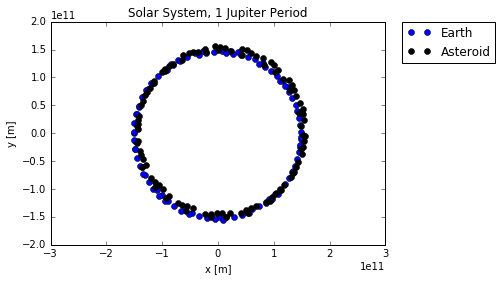

In [6]:
#plt.plot(Period_Jupiter[:,0],  Period_Jupiter[:,2],  'ro', color='y', label='Sun')
#plt.plot(Period_Jupiter[:,4],  Period_Jupiter[:,6],  'ro', color='c', label='Mercury')
#plt.plot(Period_Jupiter[:,8],  Period_Jupiter[:,10], 'ro', color='g', label='Venus')
plt.plot(Period_Jupiter[:,12], Period_Jupiter[:,14], 'ro', color='b', label='Earth')
#plt.plot(Period_Jupiter[:,16], Period_Jupiter[:,18], 'ro', color='r', label='Mars')
#plt.plot(Period_Jupiter[:,20], Period_Jupiter[:,22], 'ro', color='m', label='Jupiter')
#plt.plot(Period_Jupiter[:,24], Period_Jupiter[:,26], 'ro', color='k', label='Saturn')
#plt.plot(Period_Jupiter[:,28], Period_Jupiter[:,30], 'ro', color='c', label='Uranus')
#plt.plot(Period_Jupiter[:,32], Period_Jupiter[:,34], 'ro', color='g', label='Neptune')
plt.plot(Period_Jupiter[:,36], Period_Jupiter[:,38], 'ro', color='k', label='Asteroid')

plt.title('Solar System, 1 Jupiter Period')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

In [53]:
#####  First attempt at a collision function, restarts simulation with new parameters

N = 101
t3 = np.linspace(0, T_Earth, N)
t5 = np.linspace(0, T_Jupiter, N)

y_arr = np.array([ D3, -V3, 0.0, 0.0,
                  -D ,  V , 0.0, 0.0]) #1-D collision test
                  #             0.0,               0.0,              0.0,              0.0,
                  #D1*np.cos(np.pi), -V1*np.sin(np.pi), D1*np.sin(np.pi), V1*np.cos(np.pi),
                  #D2*np.cos(np.pi), -V2*np.sin(np.pi), D2*np.sin(np.pi), V2*np.cos(np.pi),
                  #D3*np.cos(np.pi), -V3*np.sin(np.pi), D3*np.sin(np.pi), V3*np.cos(np.pi),
                  #D4*np.cos(np.pi), -V4*np.sin(np.pi), D4*np.sin(np.pi), V4*np.cos(np.pi),
                  #D5*np.cos(np.pi), -V5*np.sin(np.pi), D5*np.sin(np.pi), V5*np.cos(np.pi),
                  #D6*np.cos(np.pi), -V6*np.sin(np.pi), D6*np.sin(np.pi), V6*np.cos(np.pi),
                  #D7*np.cos(np.pi), -V7*np.sin(np.pi), D7*np.sin(np.pi), V7*np.cos(np.pi),
                  #D8*np.cos(np.pi), -V8*np.sin(np.pi), D8*np.sin(np.pi), V8*np.cos(np.pi),
                  #D*np.cos(np.pi/2), V*np.sin(np.pi/2),D*np.sin(np.pi/2),-V*np.cos(np.pi/2)])

In [54]:
### Need to modify this code to take into account inelastic collisions:

def genOrbitalMotion(y_arr, t):
    n = int(len(y_arr) / 4)
    countN = 0                                         # keeps track of how many times it has iterated
    
    X = np.zeros(n)
    Y = np.zeros(n)
    ans_arr = np.zeros_like(y_arr)
    Vx = np.zeros(n)                                   # velocity in x direction array
    Vy = np.zeros(n)                                   # velocity in y direction array
    Ax = np.zeros(n)                                   # acceleration in x direction array
    Ay = np.zeros(n)                                   # acceleration in y direction array
    
    X = y_arr[0 : : 4]                                 # assign x position array
    Y = y_arr[2 : : 4]                                 # assign y position array
    Vx = y_arr[1 : : 4]                                # assign Vx array
    Vy = y_arr[3 : : 4]                                # assign Vy array
    
    for i in range(n):
        sumx, sumy = 0, 0
        for j in range(n):
            if i == j:
                continue
            Sep = np.sqrt((X[i] - X[j])**2 + (Y[i] - Y[j])**2)      # Sep is direct separation between the bodies
            
            if Sep <= Radius[i] + Radius[j]:                        # Checks if a collision has ocurred
                Radius[i] = Radius[i] + Radius[j]
                
                #X[j] = X[i]
                #Y[j] = Y[i]
                
                Vx[i] = (Mass[i]*Vx[i] + Mass[j]*Vx[j]) / (Mass[i] + Mass[j])     # conservation of linear momentum in x
                Vy[i] = (Mass[i]*Vy[i] + Mass[j]*Vy[j]) / (Mass[i] + Mass[j])     # conservation of linear momentum in y
                Vx[j] = Vx[i]
                Vy[j] = Vy[i]
                
                Mass[i] = Mass[i] + Mass[j]
                Mass[j] = 0
                
                #Ax[j] = Ax[i]
                #Ay[j] = Ay[i]
                
                countN += 1
            
            sumx += -(G*Mass[j]*(X[i] - X[j])) / (Sep**3)
            sumy += -(G*Mass[j]*(Y[i] - Y[j])) / (Sep**3)
            countN += 1
        Ax[i], Ay[i] = sumx, sumy
    
    ans_arr[0 : : 4] = Vx                              # assign Vx in ans_arr
    ans_arr[2 : : 4] = Vy                              # assign Vy in ans_arr
    ans_arr[1 : : 4] = Ax                              # assign Ax in ans_arr
    ans_arr[3 : : 4] = Ay                              # assign Ay in ans_arr
    return np.array(ans_arr)

def orbitalMotion(y_arr, t):
    ans_arr = odeint(genOrbitalMotion, y_arr, t)
    return np.array(ans_arr)

In [55]:
Period_Earth_Test_Collision = orbitalMotion(y_arr, t3)

c:\users\dito\miniconda3\lib\site-packages\ipykernel\__main__.py:47: RuntimeWarning: invalid value encountered in double_scalars
c:\users\dito\miniconda3\lib\site-packages\ipykernel\__main__.py:48: RuntimeWarning: invalid value encountered in double_scalars
c:\users\dito\miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


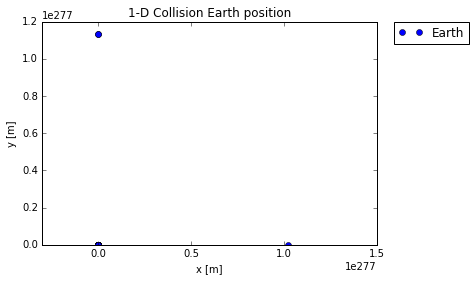

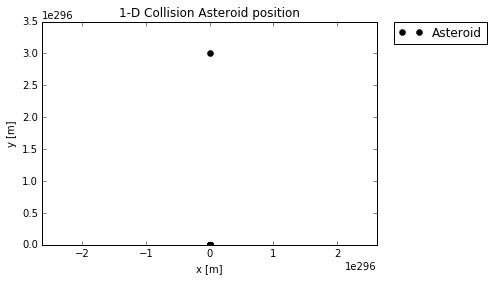

In [56]:
plt.plot(Period_Earth_Test_Collision[:,0], Period_Earth_Test_Collision[:,2], 'ro', color='b', label='Earth')
plt.title('1-D Collision Earth position')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

plt.plot(Period_Earth_Test_Collision[:,4], Period_Earth_Test_Collision[:,6], 'ro', color='k', label='Asteroid')
plt.title('1-D Collision Asteroid position')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axes().set_aspect('equal', 'datalim')
plt.show()